# Plots of most systems

Results of runs overnight on 23 August.

In [1]:
import matplotlib.pyplot as plt
from plotting import plot_averaged_training_charts, plot_comparison, make_axes, show_timestamp_info

In [2]:
common_specs = {
    'rounds':                 ('expect', 150),
    'batch_size':             ('expect', 64),
    'epochs':                 ('expect', 1),
    'ema_coefficient':        ('expect', 1 / 3),
    'save_squared_error':     ('expect', False),
    'send':                   ('expect', 'deltas'),
    'power':                  ('title',  1.0),
    'optimizer_client':       ('expect', 'sgd'),
    'clients':                ('title',  20),
    'noise':                  ('series', '__all__'),
    'lr_scheduler_client':    ('expect', 'none'),
}
base_analog_specs = common_specs.copy()
base_analog_specs.update({
    'script': 'dynpower.py',
    'power_update_period':    ('expect', 1),
    'power_quantile':         ('expect', 0.9),
    'power_factor':           ('expect', 0.9),
})
base_digital_specs = common_specs.copy()
base_digital_specs.update({
    'script': 'dynquant.py',
    'qrange_update_period':   ('expect', 1),
    'qrange_param_quantile':  ('expect', 0.9),
    'qrange_client_quantile': ('expect', 0.9),
    'channel_uses':           ('expect', None),
    'rounding_method':        ('expect', 'stochastic'),
    'parameter_schedule':     ('expect', 'staggered'),
    'zero_bits_strategy':     ('expect', 'read-zero'),
})

# epsilon

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 09:51:06** | 23 Aug 2021, 09:56:17 | 5 min 11 s |
| last to finish | 23 Aug 2021, 13:31:39 | **23 Aug 2021, 13:46:05** | 14 min 26 s |
| shortest | 23 Aug 2021, 12:23:18 | 23 Aug 2021, 12:28:17 | **4 min 59 s** |
| longest | 23 Aug 2021, 10:41:13 | 23 Aug 2021, 10:55:55 | **14 min 41 s** |


- Skipping 12 runs that don't match on 1 keys: clients (12)
- Skipping 5 runs that don't match on 1 keys: clients (5)


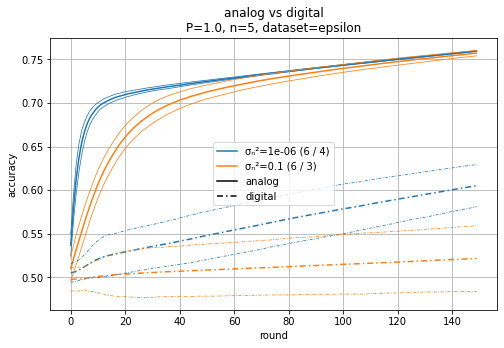

In [3]:
paths = ["results/20210823-epsilon-analog", "results/20210823-epsilon-digital"]
epsilon_specs = {
    'dataset':                ('title',  'epsilon'),
    'lr_client':              ('expect', 0.01),
    'momentum_client':        ('expect', 0.0),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', 20000),
    'clients':                ('title',  5),
}

analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(epsilon_specs)
digital_specs.update(epsilon_specs)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['confints'])

- Skipping 12 runs that don't match on 1 keys: clients (12)
- Skipping 7 runs that don't match on 1 keys: clients (7)


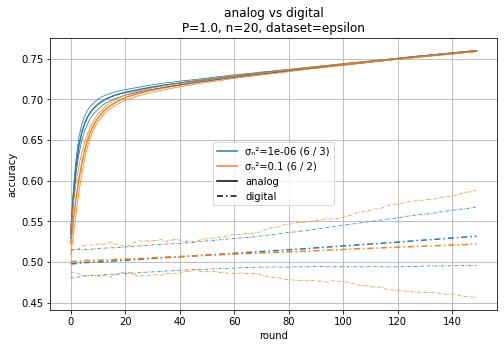

In [4]:
analog_specs['clients'] = ('title', 20)
digital_specs['clients'] = ('title', 20)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['confints'])

The digital plots here look distinctly worse than they did before. Why? Is the client synchronization fix from [`81b0ac3`](https://github.com/czlee/jadeite/commit/81b0ac354c4edfc7ea41ce00c64fc1cdffdb8c19) throwing things off?

Here's a comparison using an option I added on a new branch, in [`f6ea50f`](https://github.com/czlee/jadeite/commit/f6ea50fad57d5a2477c02e3dee1cf5b607d1de49), doing just a quick run on $n = 5, \sigma_\mathrm{n}^2 = 10^{-6}$.

- Skipping 18 runs that don't match on 2 keys: clients (12), noise (12)


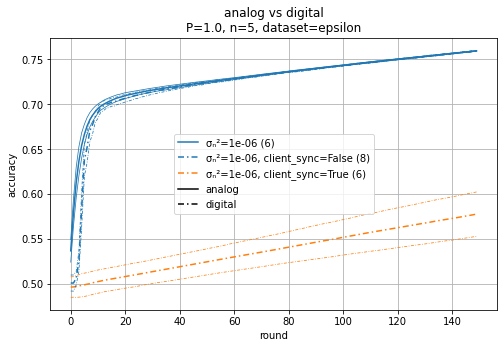

In [5]:
paths = ["results/20210823-epsilon-analog", "results/20210823-epsilon-digital-no-client-sync"]
analog_specs['noise'] = ('series', 1e-6)
analog_specs['clients'] = ('title', 5)
digital_specs['noise'] = ('series', 1e-6)
digital_specs['clients'] = ('title', 5)
digital_specs['client_sync'] = ('series', '__all__')
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['confints'], both_legends=True)

So it's like doing the client synchronization handicaps the digital scheme here—it's better if the clients just ignore the server and keep training their own thing using local data only.

# Fashion-MNIST

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 09:33:51** | 23 Aug 2021, 09:56:10 | 22 min 18 s |
| last to finish | 23 Aug 2021, 12:37:31 | **23 Aug 2021, 12:54:13** | 16 min 41 s |
| shortest | 23 Aug 2021, 12:04:13 | 23 Aug 2021, 12:20:50 | **16 min 36 s** |
| longest | 23 Aug 2021, 10:40:20 | 23 Aug 2021, 11:02:45 | **22 min 24 s** |


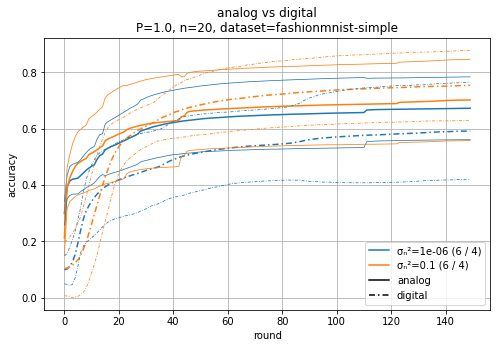

In [6]:
paths = ["results/20210823-fmnist-simple"]
fmnist_simple_specs = {
    'dataset':                ('title',  'fashionmnist-simple'),
    'lr_client':              ('expect', 0.01),
    'momentum_client':        ('expect', 0.0),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
}

analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(fmnist_simple_specs)
digital_specs.update(fmnist_simple_specs)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['confints'])

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 02:17:42** | 23 Aug 2021, 03:00:49 | 43 min 07 s |
| last to finish | 23 Aug 2021, 05:56:27 | **23 Aug 2021, 06:43:47** | 47 min 19 s |
| shortest | 23 Aug 2021, 02:17:42 | 23 Aug 2021, 03:00:49 | **43 min 07 s** |
| longest | 23 Aug 2021, 05:08:56 | 23 Aug 2021, 05:56:27 | **47 min 31 s** |


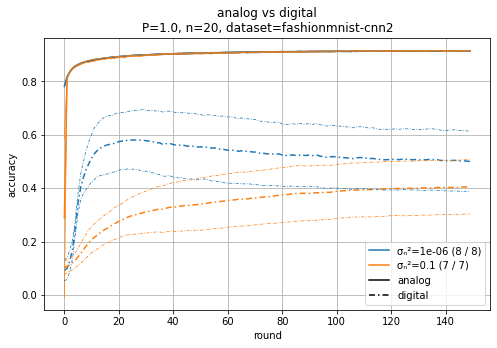

In [7]:
paths = ["results/20210823-fmnist-cnn2"]
fmnist_cnn2_specs = {
    'dataset':                ('title',  'fashionmnist-cnn2'),
    'momentum_client':        ('expect', 0.0),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
}

analog_specs = base_analog_specs.copy()
analog_specs.update(fmnist_cnn2_specs)
analog_specs['lr_client'] = ('expect', 0.05)

digital_specs = base_digital_specs.copy()
digital_specs.update(fmnist_cnn2_specs)
digital_specs['lr_client'] = ('expect', 0.01)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['confints'])

# CIFAR-10

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 09:35:48** | 23 Aug 2021, 10:21:38 | 45 min 50 s |
| last to finish | 23 Aug 2021, 12:07:32 | **23 Aug 2021, 12:52:43** | 45 min 10 s |
| shortest | 23 Aug 2021, 12:07:32 | 23 Aug 2021, 12:52:43 | **45 min 10 s** |
| longest | 23 Aug 2021, 11:07:16 | 23 Aug 2021, 11:53:21 | **46 min 05 s** |


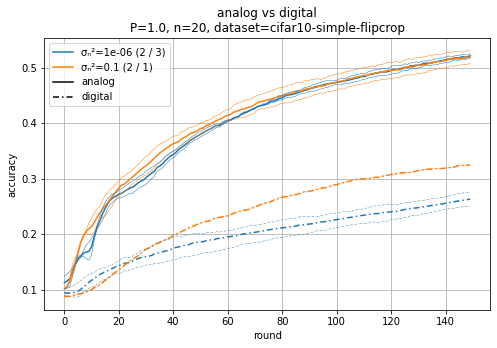

In [8]:
paths = ["results/20210823-cifar10-simple"]
cifar10_simple_specs = {
    'dataset':                ('title',  'cifar10-simple-flipcrop'),
    'lr_client':              ('expect', 0.001),
    'momentum_client':        ('expect', 0.9),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
}

analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(cifar10_simple_specs)
digital_specs.update(cifar10_simple_specs)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['range'])

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 02:18:01** | 23 Aug 2021, 03:29:27 | 1 h 11 min 26 s |
| last to finish | 23 Aug 2021, 05:09:39 | **23 Aug 2021, 06:19:18** | 1 h 09 min 38 s |
| shortest | 23 Aug 2021, 03:29:27 | 23 Aug 2021, 04:36:07 | **1 h 06 min 39 s** |
| longest | 23 Aug 2021, 02:18:01 | 23 Aug 2021, 03:33:12 | **1 h 15 min 11 s** |


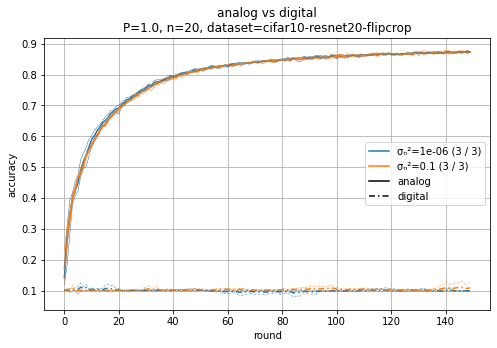

In [9]:
paths = ["results/20210823-cifar10-resnet20"]
cifar10_simple_specs = {
    'dataset':                ('title',  'cifar10-resnet20-flipcrop'),
    'lr_client':              ('expect', 0.1),
    'momentum_client':        ('expect', 0.9),
    'weight_decay_client':    ('expect', 1e-4),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
    'batch_size':             ('expect', 128),
}
analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(cifar10_simple_specs)
digital_specs.update(cifar10_simple_specs)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=['range'])